# The Battle of the Neighborhoods

download all the libraries that are needed

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

# Download and Explore Data Set

In [4]:
address = 'New York City, NY'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [12]:
geojson = 'nyc_neighbourhood.json'
geojson_df = gpd.read_file(geojson)

NameError: name 'gpd' is not defined

In [ ]:
geojson_df.head()

In [ ]:
#!conda install -c conda-forge descartes --yes
geojson_df.plot(figsize=(12,14))

In [ ]:
geojson_df.shape

In [10]:
!wget -q -O 'ny_crime.csv' https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD
print ('Data downloaded!')

Data downloaded!


In [11]:
data = pd.read_csv('ny_crime.csv')
data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,NaN,NaN,43.0,08/30/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1018029.0,240747.0,NaN,UNKNOWN,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,11/05/2006,17:40:00,66.0,11/05/2006,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,982556.0,171385.0,NaN,NaN,NaN,NaN,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
2,631420068,09/08/2006,23:30:00,09/09/2006,00:01:00,106.0,09/09/2006,347,INTOXICATED & IMPAIRED DRIVING,905.0,"INTOXICATED DRIVING,ALCOHOL",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1028213.0,186786.0,NaN,NaN,NaN,NaN,40.679260,-73.841500,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,E
3,995609899,12/13/2011,18:40:00,12/13/2011,18:49:00,79.0,12/13/2011,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000788.0,189718.0,NaN,NaN,NaN,NaN,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,480667624,08/14/2009,04:20:00,NaN,NaN,30.0,08/14/2009,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000029.0,242245.0,NaN,NaN,NaN,NaN,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E


In [13]:
#To delete the column without having to reassign df you can do:
data.drop(['ADDR_PCT_CD','KY_CD','PD_CD','CRM_ATPT_CPTD_CD','CMPLNT_TO_DT','CMPLNT_TO_TM','RPT_DT','X_COORD_CD','Y_COORD_CD','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','TRANSIT_DISTRICT','STATION_NAME','JURIS_DESC','JURISDICTION_CODE','PARKS_NM','HADEVELOPT','HOUSING_PSA'], axis=1, inplace=True)
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,BURGLARY,"BURGLARY,RESIDENCE,DAY",FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,45-64,ASIAN / PACIFIC ISLANDER,F
2,631420068,09/08/2006,23:30:00,INTOXICATED & IMPAIRED DRIVING,"INTOXICATED DRIVING,ALCOHOL",MISDEMEANOR,QUEENS,FRONT OF,STREET,40.679260,-73.841500,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH,NaN,UNKNOWN,E
3,995609899,12/13/2011,18:40:00,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,D
4,480667624,08/14/2009,04:20:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,NaN,STREET,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,UNKNOWN,E


In [14]:
data.shape

(7309655, 16)

In [15]:
# If a date does not meet the timestamp limitations, passing errors=’ignore’ will return the original input instead of raising any exception.
data['CMPLNT_FR_DT']=pd.to_datetime(data.CMPLNT_FR_DT,errors='coerce')
data['CMPLNT_FR_TM']=pd.to_datetime(data.CMPLNT_FR_TM,errors='coerce')

In [16]:
data.drop(['LOC_OF_OCCUR_DESC','PREM_TYP_DESC','VIC_AGE_GROUP','VIC_RACE','VIC_SEX'], axis=1, inplace=True)
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Lat_Lon,PATROL_BORO
0,522575447,2006-08-29,2020-06-12 13:00:00,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,BRONX,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX
1,403507361,2006-11-05,2020-06-12 11:00:00,BURGLARY,"BURGLARY,RESIDENCE,DAY",FELONY,BROOKLYN,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH
2,631420068,2006-09-08,2020-06-12 23:30:00,INTOXICATED & IMPAIRED DRIVING,"INTOXICATED DRIVING,ALCOHOL",MISDEMEANOR,QUEENS,40.679260,-73.841500,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH
3,995609899,2011-12-13,2020-06-12 18:40:00,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,BROOKLYN,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH
4,480667624,2009-08-14,2020-06-12 04:20:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH


In [17]:
df_crime = data[(data['CMPLNT_FR_DT'] >= '2019-01-01') & (data['CMPLNT_FR_DT'] <= '2019-12-31')]
df_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Lat_Lon,PATROL_BORO
3018402,918261954,2019-11-30,2020-06-12 23:01:00,MURDER & NON-NEGL. MANSLAUGHTER,NaN,FELONY,NaN,40.845120,-73.922496,"(40.84512030900004, -73.92249595899995)",NaN
3018403,884992275,2019-10-10,2020-06-12 21:54:00,MURDER & NON-NEGL. MANSLAUGHTER,NaN,FELONY,NaN,40.656068,-73.959967,"(40.65606750000006, -73.95996734599998)",NaN
3018404,560255301,2019-10-08,2020-06-12 13:40:00,MURDER & NON-NEGL. MANSLAUGHTER,NaN,FELONY,NaN,40.658159,-73.918179,"(40.65815884800003, -73.91817909399998)",NaN
3018406,943565559,2019-07-08,2020-06-12 17:40:00,MURDER & NON-NEGL. MANSLAUGHTER,NaN,FELONY,NaN,40.667909,-73.932600,"(40.66790942700004, -73.93260042799993)",NaN
3018407,279036954,2019-06-28,2020-06-12 00:25:00,MURDER & NON-NEGL. MANSLAUGHTER,NaN,FELONY,NaN,40.833155,-73.909139,"(40.833154599000075, -73.90913931099993)",NaN


In [18]:
df_crime.shape

(788159, 11)

In [19]:
df_crime.dtypes

CMPLNT_NUM               int64
CMPLNT_FR_DT    datetime64[ns]
CMPLNT_FR_TM    datetime64[ns]
OFNS_DESC               object
PD_DESC                 object
LAW_CAT_CD              object
BORO_NM                 object
Latitude               float64
Longitude              float64
Lat_Lon                 object
PATROL_BORO             object
dtype: object

In [20]:
#create geopandas from pd
gdf_crime = gpd.GeoDataFrame(
    df_crime, geometry=gpd.points_from_xy(df_crime.Longitude, df_crime.Latitude))
gdf_crime.head()

NameError: name 'gpd' is not defined

In [21]:
geojson_df.head()

NameError: name 'geojson_df' is not defined

In [22]:
crime_count=gpd.sjoin(gdf_crime, geojson_df, op='within')
#crime_count=pd.DataFrame(data=crime_count.reset_index())
#crime_count.columns=['nbrhood', 'incident_counts']
crime_count.head()

NameError: name 'gpd' is not defined

In [23]:
type_new = crime_count[['OFNS_DESC','Lat_Lon']]
type_grouped = type_new.groupby(type_new['OFNS_DESC'], as_index=False).count()
type_grouped.rename(columns={'OFNS_DESC':'Offense', 'Lat_Lon':'Count'}, inplace=True)
type_grouped.head()

NameError: name 'crime_count' is not defined

In [24]:
# Most type of crime happened
type_grouped.sort_values('Count',ascending=False)[0:10]

NameError: name 'type_grouped' is not defined

In [25]:
crime_new = crime_count[['ntaname', 'Lat_Lon']]
grouped = crime_new.groupby(crime_new['ntaname'], as_index=False).count()
grouped.rename(columns={'ntaname':'Neighborhood', 'Lat_Lon':'Count'}, inplace=True)
grouped.head()

NameError: name 'crime_count' is not defined

In [26]:
# Area with the least crime happened
grouped.sort_values('Count',ascending=True)[0:5]

NameError: name 'grouped' is not defined

In [27]:
# Area with the most crime happened
grouped.sort_values('Count',ascending=False)[0:5]

NameError: name 'grouped' is not defined

In [28]:
world_map = folium.Map(location=[latitude, longitude], zoom_start=10)
world_geo = r'nyc_neighbourhood.json'

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=grouped,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.ntaname',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Crime in NYC'
)

# display map
world_map

NameError: name 'grouped' is not defined

In [29]:
crime_new.shape

NameError: name 'crime_new' is not defined

# NYC Neighborhoods

Download and explore neighborhoods dataset

In [30]:
#!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [31]:
#open and load downloaded file
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

FileNotFoundError: [Errno 2] No such file or directory: 'newyork_data.json'

In [32]:
neighborhoods_data = newyork_data['features']
pprint(neighborhoods_data[305])

NameError: name 'newyork_data' is not defined

In [33]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

NameError: name 'neighborhoods_data' is not defined

In [34]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 0 boroughs and 0 neighborhoods.


Use Foursqure to get neighborhoods venues

In [35]:
CLIENT_ID = 'UXXDN4SWTXD1AHQFKIZ5LA4S0KV5O2SJVV0EECNNIVH4MYQDK' # your Foursquare ID
CLIENT_SECRET = 'R053PPXGSUDHMQXAUR5X5KLZW3HCUQDKLHW4TWPZLB0JL0WX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UXXDN4SWTXD1AHQFKIZ5LA4S0KV5O2SJVV0EECNNIVH4MYQDK
CLIENT_SECRET:R053PPXGSUDHMQXAUR5X5KLZW3HCUQDKLHW4TWPZLB0JL0WX


In [36]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [37]:
#the structure of the returned request
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

KeyError: 'categories'

In [38]:
category_list = category_results['response']['categories']
len(category_list)

KeyError: 'categories'

In [39]:
#to get the list and ids of the categories
for data in category_list:
    print(data['id'], data['name'])

NameError: name 'category_list' is not defined

In [40]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [41]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

NameError: name 'category_list' is not defined

Neighborhood Restaurants

In [42]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

NameError: name 'category_dict' is not defined

In [43]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [44]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

***Start 

ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

Analyze Neighboorhoods

In [45]:
#the size of the dataframe
print(nyc_venues.shape)
nyc_venues.head()

NameError: name 'nyc_venues' is not defined

In [46]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

NameError: name 'nyc_venues' is not defined

In [47]:
# list all the categories
food_categories = nyc_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in food_categories))

NameError: name 'nyc_venues' is not defined

In [48]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].isin(food_categories)].reset_index()
nyc_venues.head(5)

NameError: name 'nyc_venues' is not defined

In [49]:
print('There are {} unique FOOD categories.'.format(len(nyc_venues['Venue Category'].unique())))


NameError: name 'nyc_venues' is not defined

In [50]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

NameError: name 'nyc_venues' is not defined

One Hot Encoding

In [51]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

NameError: name 'nyc_venues' is not defined

In [52]:
nyc_onehot.shape

NameError: name 'nyc_onehot' is not defined

In [53]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

NameError: name 'nyc_onehot' is not defined

Top 10 Food Categories in Manhattan

In [54]:
venue_counts_described = venue_counts.describe().transpose()

venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

venue_top10_list = venue_top10.index.values.tolist()

NameError: name 'venue_counts' is not defined

In [55]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

NameError: name 'nyc_onehot' is not defined

In [56]:
nyc_grouped.shape

NameError: name 'nyc_grouped' is not defined

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [59]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

NameError: name 'nyc_grouped' is not defined

In [60]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

NameError: name 'nyc_grouped' is not defined

Clustering Neighboorhoods

In [61]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

NameError: name 'nyc_grouped' is not defined

In [62]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering, labels, metric = 'euclidean'))

2 

NameError: name 'nyc_grouped_clustering' is not defined

ValueError: x and y must have same first dimension, but have shapes (48,) and (0,)

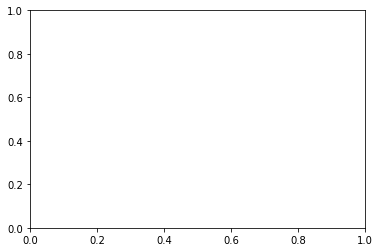

In [63]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [64]:
# set number of clusters
kclusters = 9

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_grouped_clustering)

NameError: name 'nyc_grouped_clustering' is not defined

In [65]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted.head(5)

NameError: name 'kmeans' is not defined

In [66]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
nyc_merged.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude


Visualize Clusters

In [67]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

KeyError: 'Cluster Labels'

Clustering Results

In [68]:
required_column_indices = [2,3,7]
required_column = [list(nyc_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

In [69]:
cluster_0 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[1:12]]

for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [70]:
cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[1:12]]

for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [71]:
cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[1:12]]

for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [72]:
cluster_3 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[1:12]]

for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [73]:
cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[1:12]]

for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [74]:
cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[1:12]]

for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [75]:
cluster_6 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[1:12]]
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [76]:
cluster_7 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 7, nyc_merged.columns[1:12]]
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

In [77]:
cluster_8 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 8, nyc_merged.columns[1:12]]
for col in required_column:
    print(cluster_8[col].value_counts(ascending = False))
    print("---------------------------------------------")

KeyError: 'Cluster Labels'

Visualize Results

In [78]:
nyc_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

nyc_clusters.choropleth(
    geo_data=world_geo,
    data=grouped,
    columns=['ntaname','Lat_Lon'],
    key_on='feature.properties.ntaname',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Crimes'
)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(nyc_clusters)

nyc_clusters

NameError: name 'grouped' is not defined